<a href="https://colab.research.google.com/github/LiamDuero03/DS-Society-Project/blob/main/Extra%20ML%20Material/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression: A "Hello World" in Machine Learning
This notebook demonstrates a simple **Linear Regression** model using `scikit-learn`.
The goal is to predict a continuous target variable by fitting a straight line through synthetic data.

## 1. The Setup
We'll use `numpy` for data generation, `matplotlib` for visualization, and `scikit-learn` for the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 2. Generate Synthetic Data
We're creating a dataset where $y = 4 + 3x + \text{noise}$.
* **X**: Our independent feature.
* **y**: Our target variable (what we want to predict).

In [ ]:
# Seed for reproducibility
np.random.seed(42)

# Generate 100 data points
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Visualize the "Real" World
Before modeling, it's always smart to see what we're working with. We are looking for a linear trend.



[Image of a scatter plot showing a linear relationship with noise]

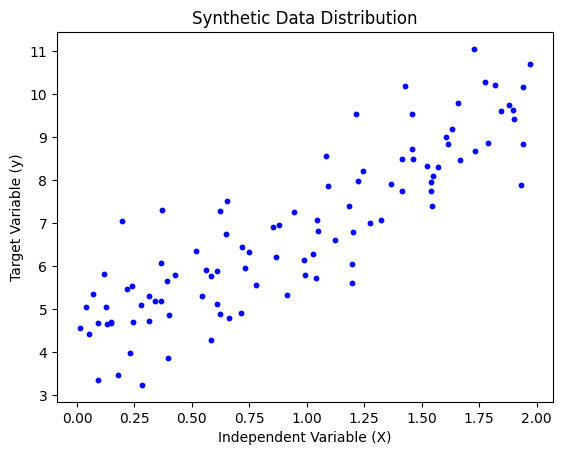

In [ ]:
plt.scatter(X, y, color='blue', s=10)
plt.xlabel("Independent Variable (X)")
plt.ylabel("Target Variable (y)")
plt.title("Synthetic Data Distribution")
plt.show()

## 4. Train the Model
We initialize the `LinearRegression` object and "fit" it. This is where the model calculates the optimal slope and intercept.

> **Note:** The model is trying to solve the equation $y = mx + b$.
> The **Coefficient** is your slope ($m$), and the **Intercept** is your constant ($b$).

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print the results
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

Intercept: 4.13
Coefficient: 2.77


## 5. Make Predictions & Plot the Best-Fit Line
Now we use our "Test" data to see how the model performs on information it hasn't seen yet.

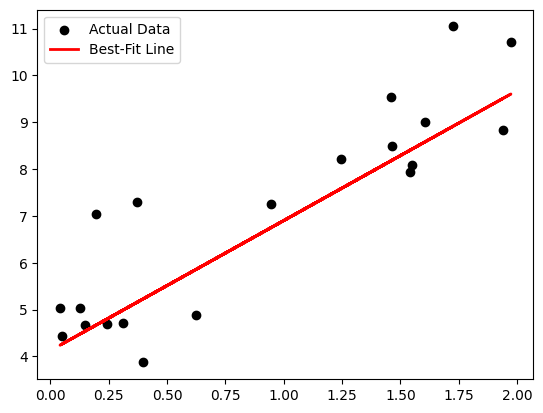

In [ ]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Best-Fit Line')
plt.legend()
plt.show()

## 6. Evaluating Model Performance
To know if our model is actually "good," we use specific metrics to measure the distance between our predictions ($\hat{y}$) and the actual values ($y$).

* **MAE (Mean Absolute Error):** The average of the absolute differences. It's easy to interpret as the "average error."
* **RMSE (Root Mean Squared Error):** The square root of the average of squared differences. It punishes large outliers more than MAE does.
* **$R^2$ (Coefficient of Determination):** Represents the proportion of variance explained by the model. $1.0$ is a perfect fit.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE is just the square root of MSE
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

--- Model Performance ---
Mean Absolute Error (MAE): 0.8400
Root Mean Squared Error (RMSE): 1.0821
R-squared (R²): 0.7513


## 7. What do these numbers tell us?
Now that we have our metrics, let's break down the "vibe" of our model:

* **MAE vs RMSE:** Notice that **RMSE (1.08)** is higher than **MAE (0.84)**. This is normal! Because RMSE squares the errors before averaging them, it gives more "weight" to the points that are furthest from the line.
* **The $R^2$ Score:** At **0.75**, our line is doing a significantly better job than a simple horizontal line representing the mean of $y$.